#Thành viên nhóm 1:
###Bùi Nguyễn Thùy Như - K194141737
###Hồ Ngọc Quỳnh Như - K194141738
###Nguyễn Thị Huệ Minh - K194141733
###Lê Trung Chính - K194141716
###Phạm Văn Vĩnh - Lộc K194141731

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/My Drive/Rui ro tin dung"
# mount to google drive folder containing data

Mounted at /content/gdrive


#**Import Libraries**

In [ ]:
from sklearn.metrics import roc_curve, auc
import pandas as pd #library for working with data frames
import seaborn as sns #draw
import numpy as np # library working with numbers
import matplotlib.pyplot as plt #draw

# **2-class classification**
- **1: Trả nợ đúng hạn (Không có rủi ro (Tốt))**
- **2: Trả nợ không đúng hạn (Có rủi ro (Xấu))**

In [ ]:
data = pd.read_excel(path + "/Dữ liệu 4.xlsx") # read data from the upper path
 # .read_csv
 # .read_excel

In [ ]:
data = data.drop('Dấu thời gian', 1) #remove unnecessary 'Dấu thời gian' column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
data

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
0,2: Trả nợ không đúng hạn,1: Thấp (X<= 39.425.000),0: Không thuộc sỡ hữu người vay,1: Ít nguồn thu nhập (X<2),1: X<=2 năm,1: QHTD lần đầu (X = 1),3. Ly dị,3. Cao tuổi (X>65 tuổi)
1,2: Trả nợ không đúng hạn,1: Thấp (X<= 39.425.000),0: Không thuộc sỡ hữu người vay,2: Nhiều nguồn thu nhập (X>=2),1: X<=2 năm,1: QHTD lần đầu (X = 1),1. Độc thân,1. Thanh niên (<=35 tuổi)
2,1: Trả nợ đúng hạn,4: Rất cao (X>98.479.500),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),3: X>5 năm,2: QHTD nhiều lần (X > 1),2. Đã kết hôn,2. Trung niên (35<X <=65 tuổi)
3,2: Trả nợ không đúng hạn,1: Thấp (X<= 39.425.000),0: Không thuộc sỡ hữu người vay,1: Ít nguồn thu nhập (X<2),2: 2<X<= 5 năm,1: QHTD lần đầu (X = 1),3. Ly dị,2. Trung niên (35<X <=65 tuổi)
4,2: Trả nợ không đúng hạn,1: Thấp (X<= 39.425.000),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),2: 2<X<= 5 năm,1: QHTD lần đầu (X = 1),3. Ly dị,2. Trung niên (35<X <=65 tuổi)
...,...,...,...,...,...,...,...,...
145,1: Trả nợ đúng hạn,3: Cao (61.500.000<X<=98.479.500),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),3: X>5 năm,2: QHTD nhiều lần (X > 1),2. Đã kết hôn,2. Trung niên (35<X <=65 tuổi)
146,1: Trả nợ đúng hạn,3: Cao (61.500.000<X<=98.479.500),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),3: X>5 năm,2: QHTD nhiều lần (X > 1),2. Đã kết hôn,2. Trung niên (35<X <=65 tuổi)
147,1: Trả nợ đúng hạn,3: Cao (61.500.000<X<=98.479.500),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),3: X>5 năm,2: QHTD nhiều lần (X > 1),2. Đã kết hôn,2. Trung niên (35<X <=65 tuổi)
148,1: Trả nợ đúng hạn,3: Cao (61.500.000<X<=98.479.500),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),3: X>5 năm,2: QHTD nhiều lần (X > 1),2. Đã kết hôn,2. Trung niên (35<X <=65 tuổi)


#**Data Description**

In [ ]:
data.describe()

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
count,150,150,150,150,150,150,150,150
unique,2,4,2,2,3,2,3,3
top,2: Trả nợ không đúng hạn,1: Thấp (X<= 39.425.000),1: Thuộc sở hữu người vay,2: Nhiều nguồn thu nhập (X>=2),1: X<=2 năm,2: QHTD nhiều lần (X > 1),2. Đã kết hôn,2. Trung niên (35<X <=65 tuổi)
freq,75,46,88,91,55,76,75,76


In [ ]:
for i in data.columns:  #Convert the data to categorical digit form of each feature and dependent variable.
    data[i] = data[i].apply(lambda x: x.split(':')[0])
    data[i] = data[i].apply(lambda x: x.split('.')[0])
    data[i] = data[i].apply(lambda x: int(x))
data

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
0,2,1,0,1,1,1,3,3
1,2,1,0,2,1,1,1,1
2,1,4,1,2,3,2,2,2
3,2,1,0,1,2,1,3,2
4,2,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...
145,1,3,1,2,3,2,2,2
146,1,3,1,2,3,2,2,2
147,1,3,1,2,3,2,2,2
148,1,3,1,2,3,2,2,2


In [ ]:
data["Khả năng trả nợ"].replace({1:0,2:1}, inplace=True) #Convert the categorical variable of 'Liability' from '1;2' to '0;1' to perform ROC plotting
data

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
0,1,1,0,1,1,1,3,3
1,1,1,0,2,1,1,1,1
2,0,4,1,2,3,2,2,2
3,1,1,0,1,2,1,3,2
4,1,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...
145,0,3,1,2,3,2,2,2
146,0,3,1,2,3,2,2,2
147,0,3,1,2,3,2,2,2
148,0,3,1,2,3,2,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Khả năng trả nợ           150 non-null    int64
 1   Thu nhập                  150 non-null    int64
 2   Tài sản đảm bảo           150 non-null    int64
 3   Số nguồn thu nhập         150 non-null    int64
 4   Số năm công tác           150 non-null    int64
 5   Số lần quan hệ tín dụng?  150 non-null    int64
 6   Hôn nhân                  150 non-null    int64
 7   Tuổi                      150 non-null    int64
dtypes: int64(8)
memory usage: 9.5 KB


In [ ]:
data.describe()

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.500000,2.366667,0.586667,1.606667,2.000000,1.506667,1.833333,1.826667
std,0.501675,1.131707,0.494081,0.490126,0.859218,0.501630,0.689486,0.682934
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.500000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,1.000000,4.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000


In [ ]:
data.corr() #Correlation between variables

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
Khả năng trả nợ,1.000000,-0.750639,-0.703989,-0.614138,-0.762929,-0.746733,-0.261938,-0.411370
Thu nhập,-0.750639,1.000000,0.620943,0.661043,0.710909,0.628149,0.156253,0.430129
Tài sản đảm bảo,-0.703989,0.620943,1.000000,0.654432,0.616562,0.606929,0.249547,0.542071
Số nguồn thu nhập,-0.614138,0.661043,0.654432,1.000000,0.573727,0.570334,0.301211,0.476670
Số năm công tác,-0.762929,0.710909,0.616562,0.573727,1.000000,0.716283,0.294549,0.343126
Số lần quan hệ tín dụng?,-0.746733,0.628149,0.606929,0.570334,0.716283,1.000000,0.148768,0.297257
Hôn nhân,-0.261938,0.156253,0.249547,0.301211,0.294549,0.148768,1.000000,0.437095
Tuổi,-0.411370,0.430129,0.542071,0.476670,0.343126,0.297257,0.437095,1.000000


In [ ]:
pd.DataFrame(data.corr().iloc[1:,0]) #Correlation between variables with 'Khả năng trả nợ'

,Khả năng trả nợ
Thu nhập,-0.750639
Tài sản đảm bảo,-0.703989
Số nguồn thu nhập,-0.614138
Số năm công tác,-0.762929
Số lần quan hệ tín dụng?,-0.746733
Hôn nhân,-0.261938
Tuổi,-0.411370


In [ ]:
correlation = data.corr().iloc[1:,0].values


In [ ]:
column_selected = [x for x in data.columns if (x != 'Khả năng trả nợ')]
column_selected #Features

['Thu nhập',
 'Tài sản đảm bảo',
 'Số nguồn thu nhập',
 'Số năm công tác',
 'Số lần quan hệ tín dụng?',
 'Hôn nhân',
 'Tuổi']

In [ ]:
features_importances_corr = pd.DataFrame({'FeatureName': data[column_selected].columns[0:len(data[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index) # Sort Correlation between variables with 'Khả năng trả nợ' in descending order

,FeatureName,Pearson Correlation with target
3,Số năm công tác,-0.762929
0,Thu nhập,-0.750639
4,Số lần quan hệ tín dụng?,-0.746733
1,Tài sản đảm bảo,-0.703989
2,Số nguồn thu nhập,-0.614138
6,Tuổi,-0.411370
5,Hôn nhân,-0.261938


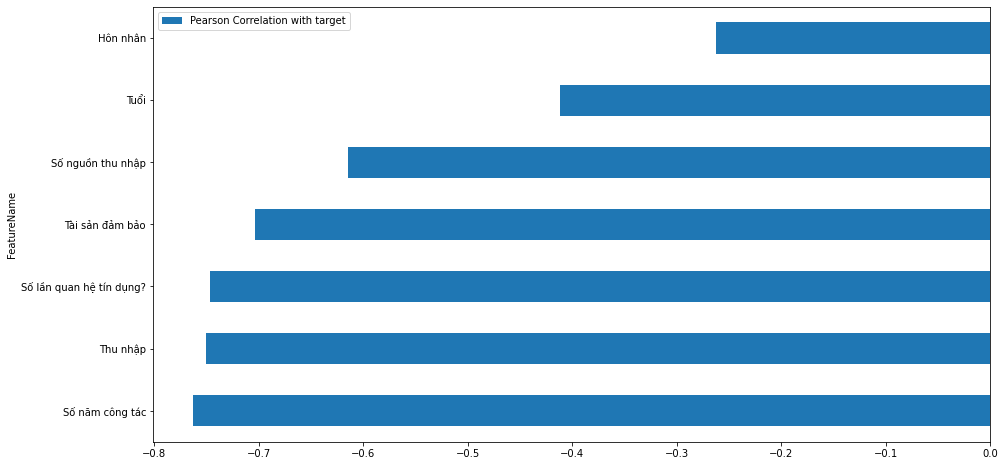

In [ ]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh") #The degree of correlation of the attributes with respect to the dependent boundary, all features are negatively correlated with the dependent variable

In [ ]:
target = ['Khả năng trả nợ']
features = list(set(list(data.columns)) - set(target)) #Make a list of variables to use as feature to use predictive model
features

['Thu nhập',
 'Số lần quan hệ tín dụng?',
 'Tài sản đảm bảo',
 'Số nguồn thu nhập',
 'Số năm công tác',
 'Tuổi',
 'Hôn nhân']

In [ ]:
from sklearn.model_selection import train_test_split
x = data[features].values
y = data[target].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=33) #Divide the dataset into a train set and a test set with 23 observations to test the predicted data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score #Import libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train.ravel())

y_pred = LR_classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', accuracy_score(y_test, y_pred)) #Create Confusion Matrix of Logistic Regression

[[10  1]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.92      1.00      0.96        12

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.96        23
weighted avg       0.96      0.96      0.96        23

Logistic Regression accuracy:  0.9565217391304348


In [ ]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()}) #Symmetry table of the set of values ​​y -test and y-predict 
df_report

,Ground Truth,Prediction
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,0,0


In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': data.columns[1:len(data.columns)], 'Logistic Regression Feature Importance': importance_lr})
# features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
1,Tài sản đảm bảo,-1.532803
2,Số nguồn thu nhập,-1.322364
0,Thu nhập,-1.025314
4,Số lần quan hệ tín dụng?,-0.989429
6,Tuổi,-0.539704
5,Hôn nhân,-0.026143
3,Số năm công tác,0.012113


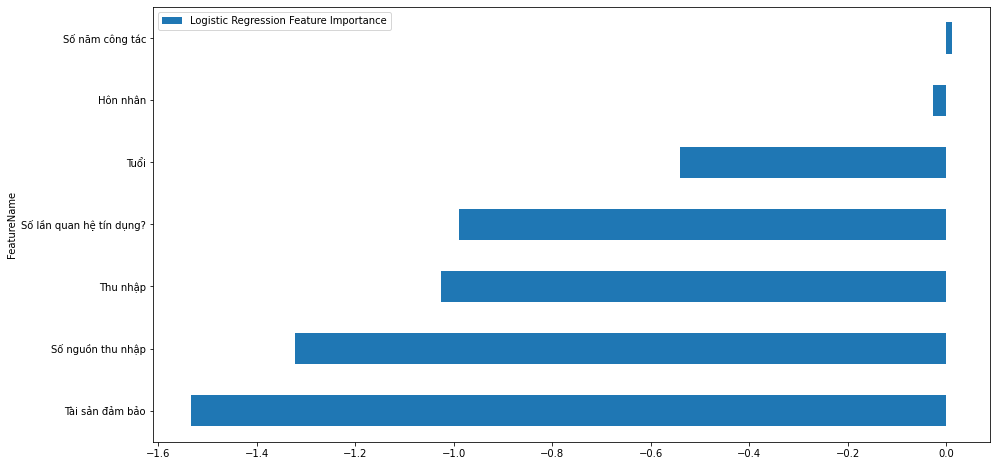

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")# Feature Importance comparison table of Logistic Regression

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier #import library

In [ ]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train.ravel())

y_pred = DT_classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred)) #Create Confusion matrix of Decision Tree

[[10  1]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23

Decision Tree accuracy:  0.9130434782608695


#**Features' Importance**

In [ ]:
importance_dt = DT_classifier.feature_importances_ #use coeffcient as importance
features_importances_dt = pd.DataFrame({'FeatureName': data.columns[1:len(data.columns)], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
0,Thu nhập,0.642436
1,Tài sản đảm bảo,0.102773
6,Tuổi,0.100719
5,Hôn nhân,0.050260
4,Số lần quan hệ tín dụng?,0.049275
2,Số nguồn thu nhập,0.028802
3,Số năm công tác,0.025735


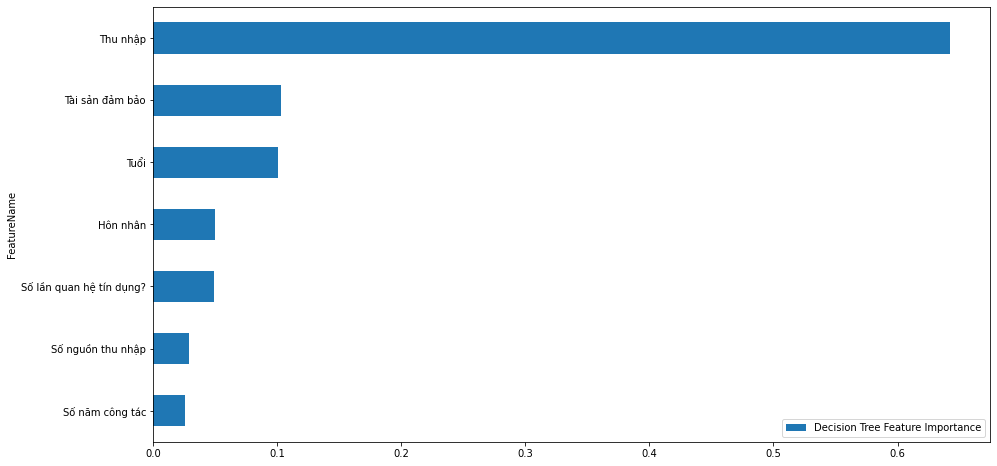

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh") # Feature Importance comparison table of Decision Tree

In [ ]:
data

,Khả năng trả nợ,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số năm công tác,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi
0,1,1,0,1,1,1,3,3
1,1,1,0,2,1,1,1,1
2,0,4,1,2,3,2,2,2
3,1,1,0,1,2,1,3,2
4,1,1,1,2,2,1,3,2
...,...,...,...,...,...,...,...,...
145,0,3,1,2,3,2,2,2
146,0,3,1,2,3,2,2,2
147,0,3,1,2,3,2,2,2
148,0,3,1,2,3,2,2,2


#**ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc): #Create function to plot ROC
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

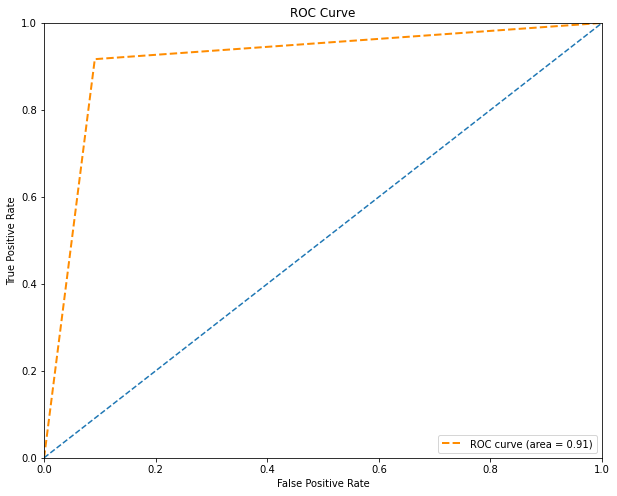

In [ ]:
y_pred_prob_test = DT_classifier.predict_proba(x_test)[:, 1] #assign data to plot ROC
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#**Decision Tree Chart**

In [ ]:
X_plot_tree = data[features] #assign data

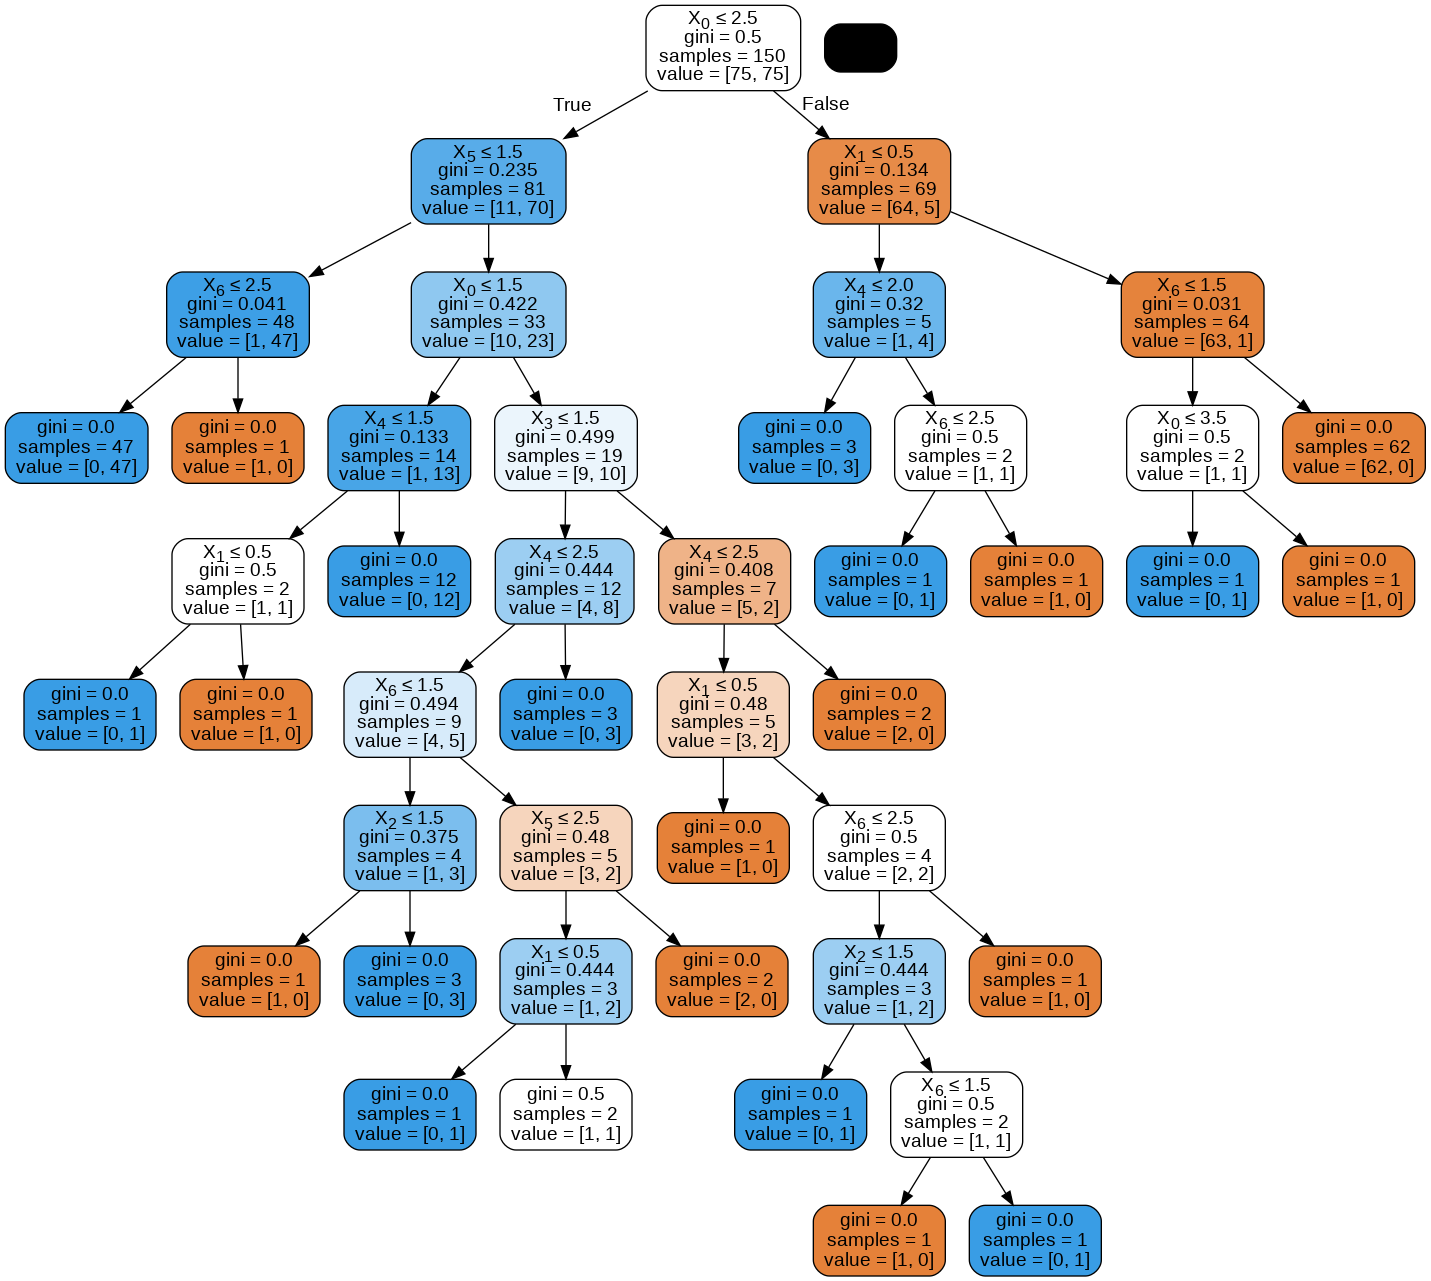

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) #Plot Decision Tree

In [ ]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i]) #Name of each feature in Decision Tree chart

X_0: Thu nhập
X_1: Tài sản đảm bảo
X_2: Số nguồn thu nhập
X_3: Số lần quan hệ tín dụng?
X_4: Hôn nhân
X_5: Tuổi
X_6: Số năm công tác


In [ ]:
x_test_reshape = x_test.reshape(1,-1)
y_test_reshape = np.squeeze(y_test)

pre_table = pd.DataFrame({'y_test': y_test_reshape,
              'y_predict': y_pred})

x_test_table = pd.DataFrame(x_test,columns=features)

x_test_table['y_test'] = pre_table['y_test']
x_test_table['y_predict'] = pre_table['y_predict'] #Create table of feature, y test and y predict to compare.

In [ ]:
x_test_table

,Thu nhập,Tài sản đảm bảo,Số nguồn thu nhập,Số lần quan hệ tín dụng?,Hôn nhân,Tuổi,Số năm công tác,y_test,y_predict
0,1,0,1,1,1,1,1,1,1
1,2,1,2,1,2,3,2,0,1
2,1,0,1,1,3,1,2,1,1
3,1,1,2,1,3,2,1,1,1
4,2,0,2,1,1,1,1,1,1
5,1,0,1,1,1,1,1,1,1
6,1,0,1,1,1,1,1,1,1
7,4,1,2,2,1,2,3,0,0
8,2,0,1,1,1,1,1,1,1
9,3,1,2,2,2,2,3,0,0
